In [1]:
# Libraries and options
# If error [No module named 'sklearn'], in terminal: conda install -c conda-forge scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
%matplotlib notebook
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

In [2]:
import pandas as pd
funda = pd.read_csv(r'C:\Users\Marselo\Documents\Github2\product3team9\data\cleaned\funda_with_buurt.csv')
funda.head()

,globalId,publicatieDatum,postcode,koopPrijs,volledigeOmschrijving,categorieObject,indTuin,perceelOppervlakte,kantoor_naam_MD5hash,aantalKamers,aantalBadkamers,energielabelKlasse,oppervlakte,datum_ondertekening,construction_year,house_type,postal_code,buurt,wijk,gemeente
0,4388064,7/31/2018,1774PG,139000.0,"Ruimte, vrijheid, en altijd het water en de we...",Woonhuis,1,NaN,09F114F5C5EC061F6230349892132149,3,NaN,NaN,62,11/12/2018,1971,"woonboot, vrijstaande woning",NaN,NaN,NaN,NaN
1,4388200,9/24/2018,7481LK,209000.0,Verrassend ruime tussenwoning nabij het centru...,Woonhuis,1,148.0,6A91BF7DB06A8DF2C9A89064F28571E7,5,1.0,B,136,8/30/2018,1980,"eengezinswoning, tussenwoning",7481LK,Haaksbergen Kern-1,Wijk 00 Haaksbergen (dorp),Haaksbergen
2,4399344,8/2/2018,1068MS,267500.0,- ENGLISH TRANSLATION - \n\nOn the 21st of Sep...,Appartement,0,NaN,E983FEDC63D87BF61AE952D181C8FD17,3,NaN,NaN,70,11/23/2018,2001,"tussenverdieping, appartement",1068MS,Calandlaan/Lelylaan,Osdorp-Oost,Amsterdam
3,4400638,8/4/2018,5628EN,349000.0,Wonen in een zeer royaal bemeten geschakelde 2...,Woonhuis,1,244.0,02BC26608B8B1A0888D3612AC7A5DB5C,5,NaN,NaN,144,12/14/2018,1973,"eengezinswoning, geschakelde 2-onder-1-kapwoning",5628EN,Woenselse Heide,Wijk 15 Stadsdeel Woensel-Noord,Eindhoven
4,4401765,8/5/2018,7731TV,495000.0,Landgoed Junne is een eeuwenoud landgoed en li...,Woonhuis,0,4500.0,F56B2705CE24B8D78A68481ED1B276CB,8,1.0,NaN,323,12/6/2018,1900,"woonboerderij, vrijstaande woning",7731TV,Buurtschap Junne,Ommen,Ommen


#### Deleting the Null Values in Kooprijs

In [2]:
funda.isnull().sum()

globalId                      0
publicatieDatum               0
postcode                      0
koopPrijs                   741
volledigeOmschrijving         0
categorieObject               0
indTuin                       0
perceelOppervlakte        67241
kantoor_naam_MD5hash          0
aantalKamers                  0
aantalBadkamers           61148
energielabelKlasse       122755
oppervlakte                   0
datum_ondertekening           0
construction_year             0
house_type                    0
postal_code                5789
buurt                      5789
wijk                       5789
gemeente                   5789
dtype: int64

In [3]:
funda_null = funda.dropna(subset = ['koopPrijs'], axis = 0, inplace = False)

In [9]:
funda_null['price_m2'] = funda_null['koopPrijs'] / funda_null['oppervlakte']

C:\Users\Marselo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='price_m2'>

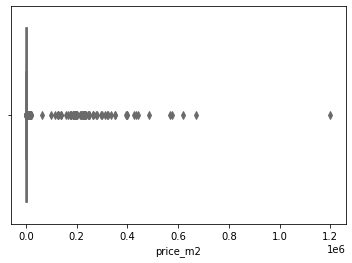

In [10]:
import seaborn as sns

sns.boxplot(x="price_m2", data=funda_null, palette="Set3")

In [20]:
funda_null[funda_null['oppervlakte'] < 10] 

,globalId,publicatieDatum,postcode,koopPrijs,volledigeOmschrijving,categorieObject,indTuin,perceelOppervlakte,kantoor_naam_MD5hash,aantalKamers,...,energielabelKlasse,oppervlakte,datum_ondertekening,construction_year,house_type,postal_code,buurt,wijk,gemeente,price_m2
1960,4422532,8/29/2018,6097AH,179000.0,Centraal gelegen in Heel bieden wij u deze hal...,Woonhuis,1,445.0,78CBF6067560D099963EEAF3B640FE26,7,...,NaN,1,10/6/2018,1960,"eengezinswoning, 2-onder-1-kapwoning",6097AH,Heel,Wijk 05 Heel,Maasgouw,179000.0
2384,4046054,12/14/2018,5212BH,440000.0,Deze woning is direct verkocht.,Woonhuis,1,146.0,D1CA68F9F32BAE4D0E61EBADEB772645,2,...,NaN,1,12/14/2017,1955,"eengezinswoning, tussenwoning",5212BH,De Vliert,Muntel / Vliert,'s-Hertogenbosch,440000.0
3218,4065556,3/5/2018,6824GA,250000.0,Deze fraaie eindwoning met dakopbouw is verkoc...,Woonhuis,1,155.0,C851362453C3209B76236B60B2D144FA,6,...,C,1,1/31/2018,1928,"eengezinswoning, hoekwoning",6824GA,Plattenburg,Velperweg e.o.,Arnhem,250000.0
3630,4095993,2/9/2018,8181GD,400000.0,DEZE WONING IS DIRECT VERKOCHT!\n\nUNIEKE KANS...,Woonhuis,1,871.0,5D17AA71E3B42EEC1E01B0B615E4EACA,7,...,NaN,1,2/9/2018,1848,"eengezinswoning, vrijstaande woning",8181GD,Heerde,Wijk 00 Heerde,Heerde,400000.0
3720,4079298,1/24/2018,5811AS,138000.0,Wil je graag buiten wonen en heb je ruimte nod...,Woonhuis,0,1300.0,5633889B52210EA041C379EC8E8B8202,1,...,NaN,1,2/2/2018,1920,"eengezinswoning, halfvrijstaande woning",5811AS,Castenray,Castenray,Venray,138000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173144,4534865,11/5/2018,7676DB,229000.0,Kavel 8\nIn nieuwbouwwijk de “Kruidenwijk” in ...,Woonhuis,0,287.0,360D783FB3A5950255BCB29A20BB05C8,1,...,NaN,1,1/31/2019,2011,"eengezinswoning, halfvrijstaande woning",7676DB,Westerhaar-West,Wijk 02 Westerhaar-Vriezenveensewijk,Twenterand,229000.0
176741,4484160,10/19/2018,5825AT,250000.0,2-onder-één-kap woning op een unieke locatie a...,Woonhuis,1,776.0,A6229C2C1FB4BDA68BB691EA77D13660,5,...,NaN,1,10/19/2018,1978,"eengezinswoning, 2-onder-1-kapwoning",5825AT,Overloon Centrum,Wijk 07 Overloon,Boxmeer,250000.0
179213,4491618,10/24/2018,9162GC,312500.0,Op 255 m2 eigen grond geschakelde woning in aa...,Woonhuis,1,255.0,461C27C2825ADA1569A8CC7F514001D3,3,...,A++,1,11/16/2018,2018,"eengezinswoning, geschakelde woning",9162GC,Ballum,Wijk 00,Ameland,312500.0
200803,4603733,12/17/2018,4205CD,225000.0,Direct verkocht via social media en ons woonma...,Woonhuis,0,172.0,6F11A15F6AB9D12A0FEB0BF723F35EED,1,...,NaN,1,12/17/2018,1939,"herenhuis, hoekwoning",4205CD,Haarwijk Oost,Wijk 04 haarwijk,Gorinchem,225000.0


In [7]:
funda_app = funda_null[funda_null['categorieObject'] == 'Appartement' ]
funda_house = funda_null[funda_null['categorieObject'] == 'Woonhuis']

#### Replacing perceelOppervlakte of woonhuis with its median and 
#### Replacing perceelOppervlakte of appartmenet with oppervlakte

In [8]:
#Median of perceelOppervlakte of woonhuis
median_house = funda_house['perceelOppervlakte'].median()

#impute perceelOppervlakte of appartment with oppervlakte
for row in range(len(funda_null)):
    if funda_null['perceelOppervlakte'].isna().iloc[row] == True and funda_null['categorieObject'].iloc[row] == 'Appartement':
        funda_null['perceelOppervlakte'].iloc[row] = funda_null['oppervlakte'].iloc[row]
    elif funda_null['perceelOppervlakte'].isna().iloc[row] == True and funda_null['categorieObject'].iloc[row] == 'Woonhuis':
        funda_null['perceelOppervlakte'].iloc[row] = median_house
        


C:\Users\Marselo\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Marselo\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Marselo\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


KeyboardInterrupt: 

In [ ]:
funda_null[funda_null['perceelOppervlakte'] == 208.0]

#### Replacing aantalBadkamers with the its median

In [68]:
median_badkamers = funda_null['aantalBadkamers'].median()

for row in range(len(funda_null)):
    if funda_null['aantalBadkamers'].isna().iloc[row] == True:
        funda_null['aantalBadkamers'].iloc[row] = median_badkamers


In [69]:
funda_null.head(10)

,globalId,publicatieDatum,postcode,koopPrijs,volledigeOmschrijving,categorieObject,indTuin,perceelOppervlakte,kantoor_naam_MD5hash,aantalKamers,aantalBadkamers,energielabelKlasse,oppervlakte,datum_ondertekening,construction_year,house_type,postal_code,buurt,wijk,gemeente
0,4388064,7/31/2018,1774PG,139000.0,"Ruimte, vrijheid, en altijd het water en de we...",Woonhuis,1,208.0,09F114F5C5EC061F6230349892132149,3,1.0,NaN,62,11/12/2018,1971,"woonboot, vrijstaande woning",NaN,NaN,NaN,NaN
1,4388200,9/24/2018,7481LK,209000.0,Verrassend ruime tussenwoning nabij het centru...,Woonhuis,1,148.0,6A91BF7DB06A8DF2C9A89064F28571E7,5,1.0,B,136,8/30/2018,1980,"eengezinswoning, tussenwoning",7481LK,Haaksbergen Kern-1,Wijk 00 Haaksbergen (dorp),Haaksbergen
2,4399344,8/2/2018,1068MS,267500.0,- ENGLISH TRANSLATION - \n\nOn the 21st of Sep...,Appartement,0,70.0,E983FEDC63D87BF61AE952D181C8FD17,3,1.0,NaN,70,11/23/2018,2001,"tussenverdieping, appartement",1068MS,Calandlaan/Lelylaan,Osdorp-Oost,Amsterdam
3,4400638,8/4/2018,5628EN,349000.0,Wonen in een zeer royaal bemeten geschakelde 2...,Woonhuis,1,244.0,02BC26608B8B1A0888D3612AC7A5DB5C,5,1.0,NaN,144,12/14/2018,1973,"eengezinswoning, geschakelde 2-onder-1-kapwoning",5628EN,Woenselse Heide,Wijk 15 Stadsdeel Woensel-Noord,Eindhoven
4,4401765,8/5/2018,7731TV,495000.0,Landgoed Junne is een eeuwenoud landgoed en li...,Woonhuis,0,4500.0,F56B2705CE24B8D78A68481ED1B276CB,8,1.0,NaN,323,12/6/2018,1900,"woonboerderij, vrijstaande woning",7731TV,Buurtschap Junne,Ommen,Ommen
5,4401831,8/6/2018,5971CR,162500.0,"In een rustige wijk, op korte afstand van het ...",Woonhuis,1,104.0,DA6EDCA2E6F7AADE8D9817099455ABC4,4,1.0,NaN,68,4/6/2019,1970,"eengezinswoning, hoekwoning",5971CR,'t Reuvelt,Wijk 08 Grubbenvorst,Horst aan de Maas
6,4402098,8/6/2018,9571BM,217500.0,In landelijke woonomgeving en aan de doorgaand...,Woonhuis,1,1028.0,FB71E2057357FAC18F2CDB18C3F15FC2,5,1.0,C,184,3/15/2019,1987,"eengezinswoning, vrijstaande woning",9571BM,Tweede Exloërmond,Wijk 15 Tweede Exloërmond,Borger-Odoorn
7,4406997,8/12/2018,1031KA,655000.0,Dit betreft bouwnummer 24 van het project Aan ...,Appartement,0,105.0,F8471E80DFB18392B3D1AA2BFD2C1CE4,3,1.0,NaN,105,2/13/2019,2019,portiekflat,1031KA,Overhoeks,Noordelijke IJ-oevers West,Amsterdam
8,4407331,8/12/2018,9076BK,180000.0,"Levensloop bestendige, jaren 30 woning, met sl...",Woonhuis,0,371.0,B17343CFB6032D8E7AADDD7503A416ED,4,1.0,NaN,93,2/28/2019,1933,"eengezinswoning, 2-onder-1-kapwoning",9076BK,St.-Annaparochie,Wijk 00 - St.-Annaparochie e.o.,Waadhoeke
9,4417043,9/8/2018,4465AL,495000.0,Robuust woonhuis in klassiek stijl met heerlij...,Woonhuis,1,880.0,3BB61B3A4BCF2EED8CDEE3D53AF510EA,5,2.0,B,156,11/2/2018,1998,"eengezinswoning, vrijstaande woning",4465AL,Goese Meer,Wijk 01 Goes,Goes


#### Replacing missing values in energy label with 'no label'

In [70]:
funda_null['energielabelKlasse'].fillna('no_label', inplace = True)

#### Getting rid off Nas in 'buurt', 'wijk', 'gemeente'

In [71]:
funda_null = funda_null.dropna(subset = ['buurt', 'wijk', 'gemeente'])

In [72]:
funda_null.columns

Index(['globalId', 'publicatieDatum', 'postcode', 'koopPrijs',
       'volledigeOmschrijving', 'categorieObject', 'indTuin',
       'perceelOppervlakte', 'kantoor_naam_MD5hash', 'aantalKamers',
       'aantalBadkamers', 'energielabelKlasse', 'oppervlakte',
       'datum_ondertekening', 'construction_year', 'house_type', 'postal_code',
       'buurt', 'wijk', 'gemeente'],
      dtype='object')

In [73]:
#Checking the null values in the cleaned dataset
funda_null.isna().sum()

globalId                 0
publicatieDatum          0
postcode                 0
koopPrijs                0
volledigeOmschrijving    0
categorieObject          0
indTuin                  0
perceelOppervlakte       0
kantoor_naam_MD5hash     0
aantalKamers             0
aantalBadkamers          0
energielabelKlasse       0
oppervlakte              0
datum_ondertekening      0
construction_year        0
house_type               0
postal_code              0
buurt                    0
wijk                     0
gemeente                 0
dtype: int64

#### Adding Selling Days in Dataset

In [74]:
funda_null['selling_days'] = pd.to_datetime(funda_null['datum_ondertekening']) - pd.to_datetime(funda_null['publicatieDatum'])
funda_null['selling_days'] = funda_null['selling_days'].dt.days.astype('int16')

#### Adding house_age

In [75]:
funda_null['house_age'] = 2020 - funda_null['construction_year']

In [76]:
funda_null.head()

,globalId,publicatieDatum,postcode,koopPrijs,volledigeOmschrijving,categorieObject,indTuin,perceelOppervlakte,kantoor_naam_MD5hash,aantalKamers,...,oppervlakte,datum_ondertekening,construction_year,house_type,postal_code,buurt,wijk,gemeente,selling_days,house_age
1,4388200,9/24/2018,7481LK,209000.0,Verrassend ruime tussenwoning nabij het centru...,Woonhuis,1,148.0,6A91BF7DB06A8DF2C9A89064F28571E7,5,...,136,8/30/2018,1980,"eengezinswoning, tussenwoning",7481LK,Haaksbergen Kern-1,Wijk 00 Haaksbergen (dorp),Haaksbergen,-25,40
2,4399344,8/2/2018,1068MS,267500.0,- ENGLISH TRANSLATION - \n\nOn the 21st of Sep...,Appartement,0,70.0,E983FEDC63D87BF61AE952D181C8FD17,3,...,70,11/23/2018,2001,"tussenverdieping, appartement",1068MS,Calandlaan/Lelylaan,Osdorp-Oost,Amsterdam,113,19
3,4400638,8/4/2018,5628EN,349000.0,Wonen in een zeer royaal bemeten geschakelde 2...,Woonhuis,1,244.0,02BC26608B8B1A0888D3612AC7A5DB5C,5,...,144,12/14/2018,1973,"eengezinswoning, geschakelde 2-onder-1-kapwoning",5628EN,Woenselse Heide,Wijk 15 Stadsdeel Woensel-Noord,Eindhoven,132,47
4,4401765,8/5/2018,7731TV,495000.0,Landgoed Junne is een eeuwenoud landgoed en li...,Woonhuis,0,4500.0,F56B2705CE24B8D78A68481ED1B276CB,8,...,323,12/6/2018,1900,"woonboerderij, vrijstaande woning",7731TV,Buurtschap Junne,Ommen,Ommen,123,120
5,4401831,8/6/2018,5971CR,162500.0,"In een rustige wijk, op korte afstand van het ...",Woonhuis,1,104.0,DA6EDCA2E6F7AADE8D9817099455ABC4,4,...,68,4/6/2019,1970,"eengezinswoning, hoekwoning",5971CR,'t Reuvelt,Wijk 08 Grubbenvorst,Horst aan de Maas,243,50


#### Dealing with Energy Label

In [77]:
for row in range(len(funda_null)):
    if funda_null['energielabelKlasse'].iloc[row] == 'no_label':
        funda_null['energielabelKlasse'].iloc[row] = funda_null['energielabelKlasse'].iloc[row]
    else:
        funda_null['energielabelKlasse'].iloc[row] = funda_null['energielabelKlasse'].iloc[row][0]

#### Choosing the right columns for further analysis

In [78]:
funda_final = funda_null[['categorieObject', 'indTuin', 'perceelOppervlakte', 'energielabelKlasse', 'aantalKamers', 'aantalBadkamers', 'oppervlakte', 'selling_days', 'house_age', 'buurt','koopPrijs']]
funda_final.head()

,categorieObject,indTuin,perceelOppervlakte,energielabelKlasse,aantalKamers,aantalBadkamers,oppervlakte,selling_days,house_age,buurt,koopPrijs
1,Woonhuis,1,148.0,B,5,1.0,136,-25,40,Haaksbergen Kern-1,209000.0
2,Appartement,0,70.0,no_label,3,1.0,70,113,19,Calandlaan/Lelylaan,267500.0
3,Woonhuis,1,244.0,no_label,5,1.0,144,132,47,Woenselse Heide,349000.0
4,Woonhuis,0,4500.0,no_label,8,1.0,323,123,120,Buurtschap Junne,495000.0
5,Woonhuis,1,104.0,no_label,4,1.0,68,243,50,'t Reuvelt,162500.0


#### Classify the buurt based on the average house price

In [36]:
funda_subset = funda_null[['buurt', 'koopPrijs']]
funda_subset.isna().sum()

buurt        0
koopPrijs    0
dtype: int64

In [37]:
funda_buurt_grouped = funda_subset.groupby('buurt').mean().reset_index()
buurt_classification = []
for row in range(len(funda_buurt_grouped)):
    if funda_buurt_grouped['koopPrijs'].loc[row] <= 200000:
        brt_class = 'Low'
        buurt_classification.append(brt_class)
    elif funda_buurt_grouped['koopPrijs'].loc[row] > 200000 and funda_buurt_grouped['koopPrijs'].loc[row] <= 270000:
        brt_class = 'Moderate'
        buurt_classification.append(brt_class)
    elif funda_buurt_grouped['koopPrijs'].loc[row] > 270000 and funda_buurt_grouped['koopPrijs'].loc[row] <= 375000:
        brt_class = 'High'
        buurt_classification.append(brt_class)
    else:
        brt_class = 'Extremely High'
        buurt_classification.append(brt_class)
funda_buurt_grouped['buurt_classification'] = buurt_classification
funda_buurt_grouped = funda_buurt_grouped.drop('koopPrijs', axis = 1 )
funda_buurt_grouped

,buurt,buurt_classification
0,'n Oaln Diek,Moderate
1,'s Gravenland,Extremely High
2,'s Gravenmoer,High
3,'s-Graveland,Extremely High
4,'s-Gravendamseweg,Moderate
...,...,...
9807,muren,High
9808,nachthok,High
9809,terschuur,High
9810,velden,High


In [38]:
funda_final = pd.merge(funda_final, funda_buurt_grouped, left_on = 'buurt', right_on = 'buurt', how ='left')
funda_final = funda_final.drop('buurt', axis = 1)
funda_final

,categorieObject,indTuin,perceelOppervlakte,energielabelKlasse,aantalKamers,aantalBadkamers,oppervlakte,selling_days,house_age,koopPrijs,buurt_classification
0,Woonhuis,1,208.0,B,5,1.0,136,-25,40,209000.0,Moderate
1,Appartement,0,70.0,no_label,3,1.0,70,113,19,267500.0,High
2,Woonhuis,1,208.0,no_label,5,1.0,144,132,47,349000.0,Moderate
3,Woonhuis,0,208.0,no_label,8,1.0,323,123,120,495000.0,Extremely High
4,Woonhuis,1,208.0,no_label,4,1.0,68,243,50,162500.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...
205091,Woonhuis,1,208.0,no_label,5,1.0,116,66,46,159000.0,Moderate
205092,Woonhuis,1,208.0,no_label,4,1.0,84,17,25,179000.0,Low
205093,Woonhuis,1,208.0,no_label,5,1.0,99,215,72,391500.0,High
205094,Woonhuis,1,208.0,A,7,1.0,172,98,14,375000.0,High


#### Dummy Coding 

In [39]:
funda_final['categorieObject'] = funda_final['categorieObject'].replace(['Appartement', 'Woonhuis'], [0,1])
funda_final = pd.get_dummies(funda_final, prefix = ['energielabelKlasse', 'buurt_classification'])
funda_final


,categorieObject,indTuin,perceelOppervlakte,aantalKamers,aantalBadkamers,oppervlakte,selling_days,house_age,koopPrijs,energielabelKlasse_A,...,energielabelKlasse_C,energielabelKlasse_D,energielabelKlasse_E,energielabelKlasse_F,energielabelKlasse_G,energielabelKlasse_no_label,buurt_classification_Extremely High,buurt_classification_High,buurt_classification_Low,buurt_classification_Moderate
0,1,1,208.0,5,1.0,136,-25,40,209000.0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,70.0,3,1.0,70,113,19,267500.0,0,...,0,0,0,0,0,1,0,1,0,0
2,1,1,208.0,5,1.0,144,132,47,349000.0,0,...,0,0,0,0,0,1,0,0,0,1
3,1,0,208.0,8,1.0,323,123,120,495000.0,0,...,0,0,0,0,0,1,1,0,0,0
4,1,1,208.0,4,1.0,68,243,50,162500.0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205091,1,1,208.0,5,1.0,116,66,46,159000.0,0,...,0,0,0,0,0,1,0,0,0,1
205092,1,1,208.0,4,1.0,84,17,25,179000.0,0,...,0,0,0,0,0,1,0,0,1,0
205093,1,1,208.0,5,1.0,99,215,72,391500.0,0,...,0,0,0,0,0,1,0,1,0,0
205094,1,1,208.0,7,1.0,172,98,14,375000.0,1,...,0,0,0,0,0,0,0,1,0,0


In [47]:
test = funda_final.copy()
test['selling_days'] = np.where(funda_final['selling_days'] < 0, 0, funda_final['selling_days'])

In [48]:
test

,categorieObject,indTuin,perceelOppervlakte,aantalKamers,aantalBadkamers,oppervlakte,selling_days,house_age,koopPrijs,energielabelKlasse_A,...,energielabelKlasse_C,energielabelKlasse_D,energielabelKlasse_E,energielabelKlasse_F,energielabelKlasse_G,energielabelKlasse_no_label,buurt_classification_Extremely High,buurt_classification_High,buurt_classification_Low,buurt_classification_Moderate
0,1,1,208.0,5,1.0,136,0,40,209000.0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,70.0,3,1.0,70,113,19,267500.0,0,...,0,0,0,0,0,1,0,1,0,0
2,1,1,208.0,5,1.0,144,132,47,349000.0,0,...,0,0,0,0,0,1,0,0,0,1
3,1,0,208.0,8,1.0,323,123,120,495000.0,0,...,0,0,0,0,0,1,1,0,0,0
4,1,1,208.0,4,1.0,68,243,50,162500.0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205091,1,1,208.0,5,1.0,116,66,46,159000.0,0,...,0,0,0,0,0,1,0,0,0,1
205092,1,1,208.0,4,1.0,84,17,25,179000.0,0,...,0,0,0,0,0,1,0,0,1,0
205093,1,1,208.0,5,1.0,99,215,72,391500.0,0,...,0,0,0,0,0,1,0,1,0,0
205094,1,1,208.0,7,1.0,172,98,14,375000.0,1,...,0,0,0,0,0,0,0,1,0,0


In [23]:
funda_final.corr()

,categorieObject,indTuin,perceelOppervlakte,aantalKamers,aantalBadkamers,oppervlakte,selling_days,house_age,koopPrijs,energielabelKlasse_A,...,energielabelKlasse_C,energielabelKlasse_D,energielabelKlasse_E,energielabelKlasse_F,energielabelKlasse_G,energielabelKlasse_no_label,buurt_classification_Extremely High,buurt_classification_High,buurt_classification_Low,buurt_classification_Moderate
categorieObject,1.000000,0.786416,0.955723,0.541861,0.092191,0.410531,0.117573,-0.008395,0.121087,0.022559,...,0.043076,-0.055365,-0.049209,0.006528,0.010768,-0.004771,-0.055521,0.074105,-0.058216,0.010948
indTuin,0.786416,1.000000,0.750026,0.455660,0.089432,0.321716,0.066569,0.029089,0.104173,0.023139,...,0.069389,-0.011970,-0.031509,0.003798,0.012173,-0.056825,-0.051618,0.062692,-0.049948,0.014068
perceelOppervlakte,0.955723,0.750026,1.000000,0.578788,0.123635,0.491303,0.138699,-0.018873,0.212501,0.032134,...,0.032213,-0.065634,-0.057317,0.004874,0.007277,0.003808,-0.021144,0.071553,-0.078482,-0.004339
aantalKamers,0.541861,0.455660,0.578788,1.000000,0.287809,0.692309,0.148263,0.071809,0.394314,0.020077,...,0.010893,-0.021810,-0.033535,0.003024,0.009671,-0.003020,0.069365,0.025094,-0.074915,-0.040413
aantalBadkamers,0.092191,0.089432,0.123635,0.287809,1.000000,0.409174,0.091878,0.092471,0.427865,0.014863,...,-0.023685,-0.005109,-0.007122,0.002619,0.003580,0.009113,0.164249,-0.030673,-0.060628,-0.077786
oppervlakte,0.410531,0.321716,0.491303,0.692309,0.409174,1.000000,0.228996,-0.015773,0.654505,0.082292,...,-0.043019,-0.061473,-0.073224,-0.028214,-0.013838,0.040171,0.202001,0.026644,-0.145303,-0.117176
selling_days,0.117573,0.066569,0.138699,0.148263,0.091878,0.228996,1.000000,-0.034087,0.153864,-0.022649,...,-0.047567,-0.033615,-0.032752,-0.005218,0.010960,0.085693,0.041534,0.002148,-0.020410,-0.026971
house_age,-0.008395,0.029089,-0.018873,0.071809,0.092471,-0.015773,-0.034087,1.000000,0.048601,-0.272474,...,-0.000332,0.137265,0.130365,0.157917,0.160332,0.015428,0.045718,-0.093621,0.078856,0.005255
koopPrijs,0.121087,0.104173,0.212501,0.394314,0.427865,0.654505,0.153864,0.048601,1.000000,0.074329,...,-0.081990,-0.045630,-0.042996,-0.009183,-0.010236,0.053700,0.481363,-0.022095,-0.247866,-0.253599
energielabelKlasse_A,0.022559,0.023139,0.032134,0.020077,0.014863,0.082292,-0.022649,-0.272474,0.074329,1.000000,...,-0.123472,-0.084762,-0.066068,-0.053232,-0.045127,-0.384308,0.044606,0.056977,-0.076311,-0.051150


### Data Normalization Using Sklearn

In [41]:
from sklearn.model_selection import train_test_split

x = funda_final.loc[:, funda_final.columns != 'koopPrijs']
y = funda_final['koopPrijs']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=9)

## Random Forest Regression

In [46]:
# Instantiate a Random Forest model
model = RandomForestRegressor(min_samples_split=50, n_estimators=150)

# Train the model
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=50, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [47]:
# Test the model

RF_prediction = model.predict(x_test)

RF_prediction_inverted = np.expm1(RF_prediction)
y_test_inverted = np.expm1(y_test)

# Compute errors
MAE = mean_absolute_error(y_test, RF_prediction)
print('Random Forest MAE = ', MAE)

Random Forest MAE =  62004.78583128315


<IPython.core.display.Javascript object>


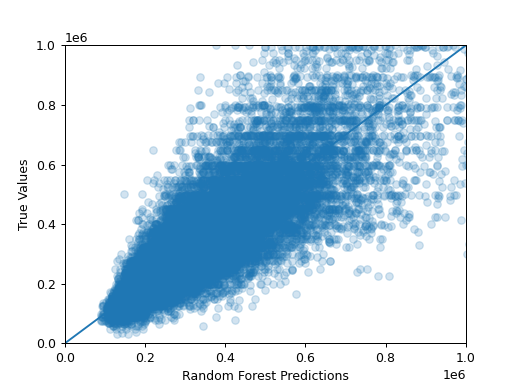

In [48]:
plt.figure()
plt.scatter(RF_prediction, y_test, alpha=0.2)
plt.xlabel('Random Forest Predictions')
plt.ylabel('True Values')
lims = [0, 1000000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.show()

In [85]:
funda_final.to_csv('funda_preprocessed2.csv', index = False)

### Splitting Training and Test Data

from sklearn.model_selection import train_test_split

x = funda_final.loc[:, funda_final.columns != 'koopPrijs']
y = funda_final['koopPrijs']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=9)

In [53]:
pd.DataFrame(x_norm, columns = x.columns)

,categorieObject,indTuin,perceelOppervlakte,aantalKamers,aantalBadkamers,oppervlakte,selling_days,house_age,categorieObject,indTuin,...,selling_days,house_age,energielabelKlasse_A,energielabelKlasse_B,energielabelKlasse_C,energielabelKlasse_D,energielabelKlasse_E,energielabelKlasse_F,energielabelKlasse_G,energielabelKlasse_no_label
0,1.0,1.0,0.178911,0.100,0.0,0.042069,0.386450,0.508321,1.0,1.0,...,0.386450,0.508321,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.059637,0.050,0.0,0.021502,0.518130,0.497731,0.0,0.0,...,0.518130,0.497731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.178911,0.100,0.0,0.044562,0.536260,0.511851,1.0,1.0,...,0.536260,0.511851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.178911,0.175,0.0,0.100343,0.527672,0.548664,1.0,0.0,...,0.527672,0.548664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,1.0,0.178911,0.075,0.0,0.020879,0.642176,0.513364,1.0,1.0,...,0.642176,0.513364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205091,1.0,1.0,0.178911,0.100,0.0,0.035837,0.473282,0.511346,1.0,1.0,...,0.473282,0.511346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
205092,1.0,1.0,0.178911,0.075,0.0,0.025865,0.426527,0.500756,1.0,1.0,...,0.426527,0.500756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
205093,1.0,1.0,0.178911,0.100,0.0,0.030539,0.615458,0.524458,1.0,1.0,...,0.615458,0.524458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
205094,1.0,1.0,0.178911,0.150,0.0,0.053288,0.503817,0.495209,1.0,1.0,...,0.503817,0.495209,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Boosting Forest Tree

In [53]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [69]:
# Instantiate Boosting model
XGBModel = XGBRegressor(n_estimators=50, max_depth=3)

# Train Boosting model
XGBModel.fit(x_train, y_train, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [70]:
# Test the model
XGB_prediction = XGBModel.predict(x_test)

# Compute error
MAE = mean_absolute_error(y_test , XGB_prediction)
print('Boosting MAE = ',MAE)

Boosting MAE =  64990.172586352695


<IPython.core.display.Javascript object>


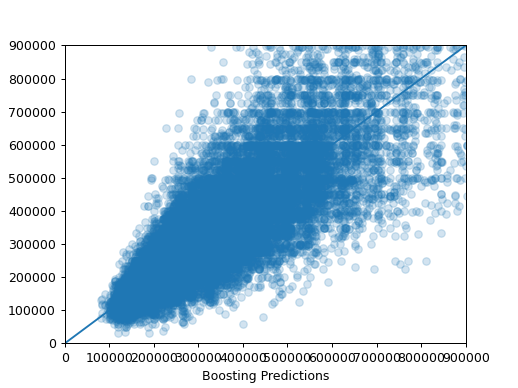

In [71]:
plt.figure()
plt.scatter(XGB_prediction, y_test, alpha=0.2)
plt.xlabel('Boosting Predictions')
plt.ylabel('True Values')
lims = [0, 900000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.show()

# Neural Network 

In [75]:
# If error [No module named 'sklearn'], in terminal: conda install -c conda-forge scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error 
%matplotlib notebook
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
# pip install git+https://github.com/tensorflow/docs
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
# Libraries and options
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten

In [126]:
# Initiate a sequential model (i.e., no recurrence)
NN_model = Sequential()

# Make the first layer
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu'))

# Make hidden layers
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))


# Make the output layer
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network
NN_model.compile(loss='mean_squared_error', optimizer='RMSprop', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 128)               3328      
_________________________________________________________________
dense_54 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_55 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 257       
Total params: 102,401
Trainable params: 102,401
Non-trainable params: 0
_________________________________________________________________


In [127]:
# Define how to name the files
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
# Instantiate the checkpoint system
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 2, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [128]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)
history = NN_model.fit(x_train, y_train, epochs=100, 
             # No. of randomly sampled data points used to compute the errors at each epoch (avoid overfitting)
             batch_size=32, 
             # Size of validation set for cross-validation
             validation_split = 0.2, 
             # Link to checkpoint system, to check teh best model previously built
             callbacks=([early_stopping]))

Epoch 1/100
4102/4102 [==============================] - 13s 3ms/step - loss: 35993205885.0363 - mean_absolute_error: 111096.5607 - val_loss: 16955294720.0000 - val_mean_absolute_error: 73613.7500
Epoch 2/100
4102/4102 [==============================] - 12s 3ms/step - loss: 18432981636.8979 - mean_absolute_error: 72369.1805 - val_loss: 16243257344.0000 - val_mean_absolute_error: 70862.7812
Epoch 3/100
4102/4102 [==============================] - 12s 3ms/step - loss: 20576590891.9249 - mean_absolute_error: 71656.9464 - val_loss: 15386831872.0000 - val_mean_absolute_error: 70011.9766
Epoch 4/100
4102/4102 [==============================] - 12s 3ms/step - loss: 16462759338.3963 - mean_absolute_error: 71238.7026 - val_loss: 16254286848.0000 - val_mean_absolute_error: 78893.3125
Epoch 5/100
4102/4102 [==============================] - 12s 3ms/step - loss: 15689062339.2289 - mean_absolute_error: 69673.7276 - val_loss: 14779973632.0000 - val_mean_absolute_error: 70008.0000
Epoch 6/100
4102/41

In [129]:
# Retrieve the hitory of every epoch's training
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,val_loss,val_mean_absolute_error,epoch
4,1.642199e+10,70050.117188,1.477997e+10,70008.000000,4
5,1.586301e+10,69593.265625,1.635709e+10,81599.679688,5
6,1.557814e+10,68908.960938,1.394673e+10,68324.406250,6
7,1.540072e+10,68523.617188,1.420416e+10,66682.539062,7
8,1.535873e+10,68147.203125,1.410266e+10,70685.054688,8


<IPython.core.display.Javascript object>


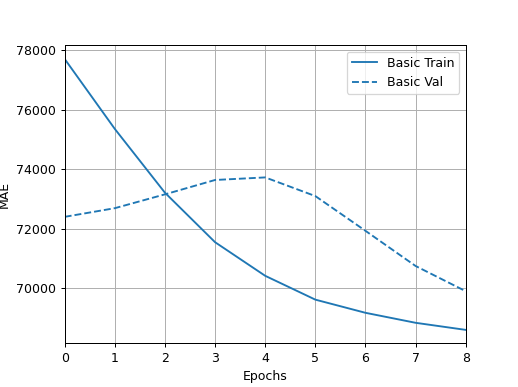

In [130]:
# Plot the evolution of errors epoch after epoch
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mean_absolute_error")
plt.ylabel('MAE')
plt.show()

## Applying Random Forest for Selling Days 

In [183]:
funda_final

,categorieObject,indTuin,perceelOppervlakte,energielabelKlasse,aantalKamers,aantalBadkamers,oppervlakte,selling_days,house_age,buurt,koopPrijs
1,Woonhuis,1,208.0,B,5,1.0,136,-25,40,Haaksbergen Kern-1,209000.0
2,Appartement,0,70.0,no_label,3,1.0,70,113,19,Calandlaan/Lelylaan,267500.0
3,Woonhuis,1,208.0,no_label,5,1.0,144,132,47,Woenselse Heide,349000.0
4,Woonhuis,0,208.0,no_label,8,1.0,323,123,120,Buurtschap Junne,495000.0
5,Woonhuis,1,208.0,no_label,4,1.0,68,243,50,'t Reuvelt,162500.0
...,...,...,...,...,...,...,...,...,...,...,...
211612,Woonhuis,1,208.0,no_label,5,1.0,116,66,46,Ten Boer,159000.0
211613,Woonhuis,1,208.0,no_label,4,1.0,84,17,25,De Dem en omgeving,179000.0
211614,Woonhuis,1,208.0,no_label,5,1.0,99,215,72,Ochten,391500.0
211615,Woonhuis,1,208.0,A,7,1.0,172,98,14,Opheusden,375000.0


In [195]:
funda_selling_days = funda_final.copy()
funda_selling_days = funda_selling_days.drop(['koopPrijs'],axis = 1)

In [197]:
funda_subset = funda_null[['buurt', 'selling_days']]
funda_subset.isna().sum()

buurt           0
selling_days    0
dtype: int64

In [198]:
funda_subset.describe()

,selling_days
count,205096.000000
mean,60.557622
std,70.206711
min,-430.000000
25%,18.000000
50%,32.000000
75%,76.000000
max,618.000000


In [199]:
funda_buurt_grouped = funda_subset.groupby('buurt').mean().reset_index()
buurt_classification = []
for row in range(len(funda_buurt_grouped)):
    if funda_buurt_grouped['selling_days'].loc[row] <= 18:
        brt_class = 'Low'
        buurt_classification.append(brt_class)
    elif funda_buurt_grouped['selling_days'].loc[row] > 18 and funda_buurt_grouped['selling_days'].loc[row] <= 32:
        brt_class = 'Moderate'
        buurt_classification.append(brt_class)
    elif funda_buurt_grouped['selling_days'].loc[row] > 32 and funda_buurt_grouped['selling_days'].loc[row] <= 76:
        brt_class = 'High'
        buurt_classification.append(brt_class)
    else:
        brt_class = 'Extremely High'
        buurt_classification.append(brt_class)
funda_buurt_grouped['brt_sldays'] = buurt_classification
funda_buurt_grouped = funda_buurt_grouped.drop('selling_days', axis = 1)
funda_buurt_grouped

,buurt,brt_sldays
0,'n Oaln Diek,High
1,'s Gravenland,Extremely High
2,'s Gravenmoer,High
3,'s-Graveland,Extremely High
4,'s-Gravendamseweg,High
...,...,...
9807,muren,High
9808,nachthok,Low
9809,terschuur,High
9810,velden,Moderate


In [200]:
funda_selling_days = pd.merge(funda_selling_days, funda_buurt_grouped, left_on = 'buurt', right_on = 'buurt', how ='left')
funda_selling_days = funda_selling_days.drop('buurt', axis = 1)
funda_selling_days

,categorieObject,indTuin,perceelOppervlakte,energielabelKlasse,aantalKamers,aantalBadkamers,oppervlakte,selling_days,house_age,brt_sldays
0,Woonhuis,1,208.0,B,5,1.0,136,-25,40,Extremely High
1,Appartement,0,70.0,no_label,3,1.0,70,113,19,Moderate
2,Woonhuis,1,208.0,no_label,5,1.0,144,132,47,High
3,Woonhuis,0,208.0,no_label,8,1.0,323,123,120,High
4,Woonhuis,1,208.0,no_label,4,1.0,68,243,50,Extremely High
...,...,...,...,...,...,...,...,...,...,...
205091,Woonhuis,1,208.0,no_label,5,1.0,116,66,46,High
205092,Woonhuis,1,208.0,no_label,4,1.0,84,17,25,High
205093,Woonhuis,1,208.0,no_label,5,1.0,99,215,72,High
205094,Woonhuis,1,208.0,A,7,1.0,172,98,14,High


In [201]:
funda_selling_days

,categorieObject,indTuin,perceelOppervlakte,energielabelKlasse,aantalKamers,aantalBadkamers,oppervlakte,selling_days,house_age,brt_sldays
0,Woonhuis,1,208.0,B,5,1.0,136,-25,40,Extremely High
1,Appartement,0,70.0,no_label,3,1.0,70,113,19,Moderate
2,Woonhuis,1,208.0,no_label,5,1.0,144,132,47,High
3,Woonhuis,0,208.0,no_label,8,1.0,323,123,120,High
4,Woonhuis,1,208.0,no_label,4,1.0,68,243,50,Extremely High
...,...,...,...,...,...,...,...,...,...,...
205091,Woonhuis,1,208.0,no_label,5,1.0,116,66,46,High
205092,Woonhuis,1,208.0,no_label,4,1.0,84,17,25,High
205093,Woonhuis,1,208.0,no_label,5,1.0,99,215,72,High
205094,Woonhuis,1,208.0,A,7,1.0,172,98,14,High


In [202]:
funda_selling_days['categorieObject'] = funda_selling_days['categorieObject'].replace(['Appartement', 'Woonhuis'], [0,1])
funda_selling_days = pd.get_dummies(funda_selling_days, prefix = ['energielabelKlasse', 'brt_sldays_x'])
funda_selling_days


,categorieObject,indTuin,perceelOppervlakte,aantalKamers,aantalBadkamers,oppervlakte,selling_days,house_age,energielabelKlasse_A,energielabelKlasse_B,energielabelKlasse_C,energielabelKlasse_D,energielabelKlasse_E,energielabelKlasse_F,energielabelKlasse_G,energielabelKlasse_no_label,brt_sldays_x_Extremely High,brt_sldays_x_High,brt_sldays_x_Low,brt_sldays_x_Moderate
0,1,1,208.0,5,1.0,136,-25,40,0,1,0,0,0,0,0,0,1,0,0,0
1,0,0,70.0,3,1.0,70,113,19,0,0,0,0,0,0,0,1,0,0,0,1
2,1,1,208.0,5,1.0,144,132,47,0,0,0,0,0,0,0,1,0,1,0,0
3,1,0,208.0,8,1.0,323,123,120,0,0,0,0,0,0,0,1,0,1,0,0
4,1,1,208.0,4,1.0,68,243,50,0,0,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205091,1,1,208.0,5,1.0,116,66,46,0,0,0,0,0,0,0,1,0,1,0,0
205092,1,1,208.0,4,1.0,84,17,25,0,0,0,0,0,0,0,1,0,1,0,0
205093,1,1,208.0,5,1.0,99,215,72,0,0,0,0,0,0,0,1,0,1,0,0
205094,1,1,208.0,7,1.0,172,98,14,1,0,0,0,0,0,0,0,0,1,0,0


In [206]:
from sklearn.model_selection import train_test_split

x = funda_selling_days.loc[:, funda_selling_days.columns != 'selling_days']
y = funda_selling_days['selling_days']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=9)

In [207]:
# Instantiate a Random Forest model
model = RandomForestRegressor(min_samples_split=50, n_estimators=150)

# Train the model
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=50, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [208]:
# Test the model

RF_prediction = model.predict(x_test)

RF_prediction_inverted = np.expm1(RF_prediction)
y_test_inverted = np.expm1(y_test)

# Compute errors
MAE = mean_absolute_error(y_test, RF_prediction)
print('Random Forest MAE = ', MAE)

Random Forest MAE =  42.87574571056248


<IPython.core.display.Javascript object>


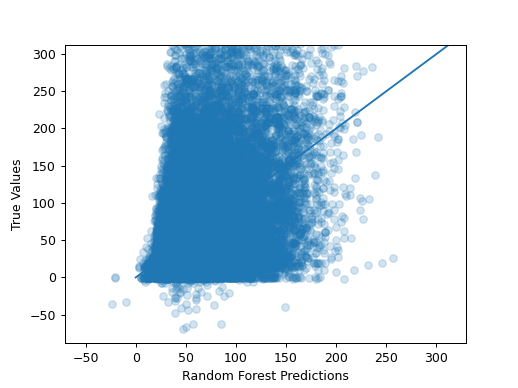

In [209]:
plt.figure()
plt.scatter(RF_prediction, y_test, alpha=0.2)
plt.xlabel('Random Forest Predictions')
plt.ylabel('True Values')
lims = [0, 400]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.show()

In [215]:
funda_selling_days.corr()['selling_days'].reset_index().sort_values(by = 'selling_days', ascending = False)

,index,selling_days
6,selling_days,1.000000
16,brt_sldays_x_Extremely High,0.330362
5,oppervlakte,0.228996
3,aantalKamers,0.148263
2,perceelOppervlakte,0.138699
0,categorieObject,0.117573
4,aantalBadkamers,0.091878
15,energielabelKlasse_no_label,0.085693
1,indTuin,0.066569
14,energielabelKlasse_G,0.010960
